In [1]:
import sys
import numpy as np
import phate
import graphtools as gt
import numpy as np
import pygsp
from src.mds import embed_MDS
import scprep
from scipy.spatial.distance import jensenshannon
from src.embedding import new_HeatGeo, DiffusionMap, ShortestPath, PhateBasic
from src.filter_approx import Heat_Euler, Heat_filter
import scanpy as sc
import matplotlib.pyplot as plt
import scipy

In [2]:
n = 10
eye = np.eye(n)
graph = pygsp.graphs.Path(n)
methods = ["euler", "pygsp", "mar", "lowrank", "exact"]

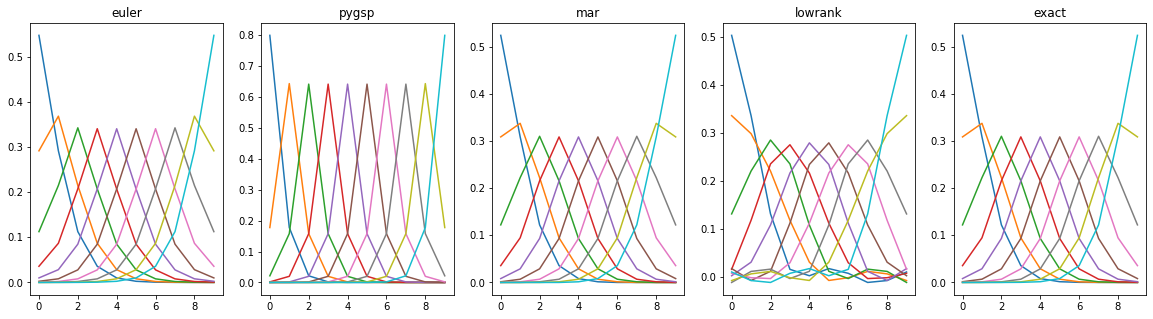

In [3]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for idx, method in enumerate(methods):
    filter = Heat_filter(graph, 1, order = 5, method=method)
    ax[idx].plot(filter(eye))
    ax[idx].set_title(method)
plt.show()

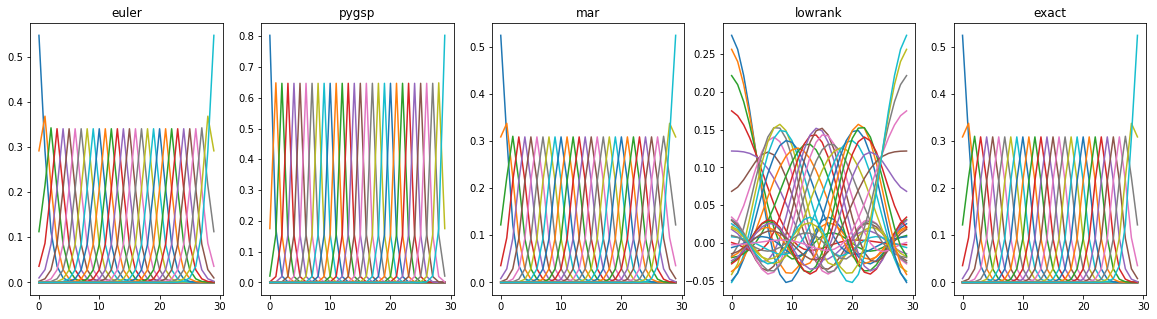

In [4]:
n = 30
eye = np.eye(n)
graph = pygsp.graphs.Path(n)
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for idx, method in enumerate(methods):
    filter = Heat_filter(graph, 1, order = 5, method=method)
    ax[idx].plot(filter(eye))
    ax[idx].set_title(method)
plt.show()

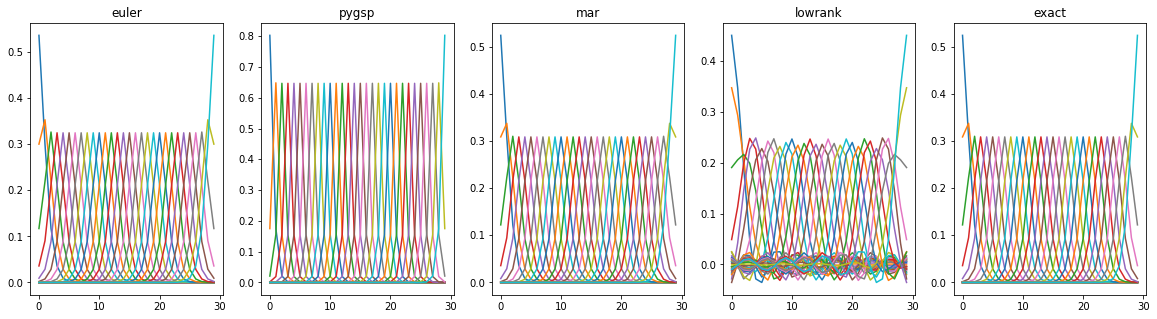

In [5]:
n = 30
eye = np.eye(n)
graph = pygsp.graphs.Path(n)
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for idx, method in enumerate(methods):
    filter = Heat_filter(graph, 1, order = 10, method=method)
    ax[idx].plot(filter(eye))
    ax[idx].set_title(method)
plt.show()

Testing the new method on the graph

In [9]:
data, labels = phate.tree.gen_dla(n_branch=3, branch_length=100)
knn=5
anisotropy=0
decay=40
tau=1

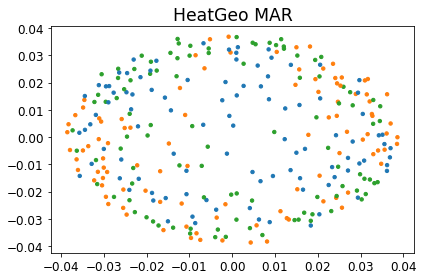

In [10]:
heat_geo_op = new_HeatGeo(knn=knn, anisotropy=anisotropy, decay=decay, tau=tau, filter_method="lowrank", order=100)
heat_geo_op.scatterplot(data, labels=labels, title="HeatGeo MAR")

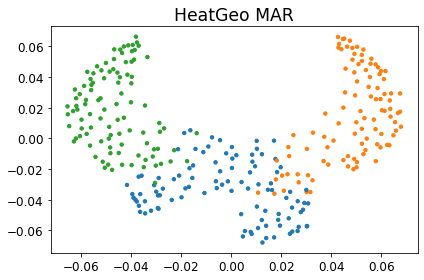

In [11]:
heat_geo_op = new_HeatGeo(knn=knn, anisotropy=anisotropy, decay=decay, tau=tau, filter_method="mar", order=10)
heat_geo_op.scatterplot(data, labels=labels, title="HeatGeo MAR")

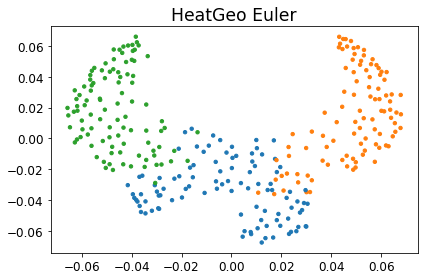

In [86]:
heat_geo_op = new_HeatGeo(knn=knn, anisotropy=anisotropy, decay=decay, tau=tau, filter_method="euler")
heat_geo_op.scatterplot(data, labels=labels, title="HeatGeo Euler")

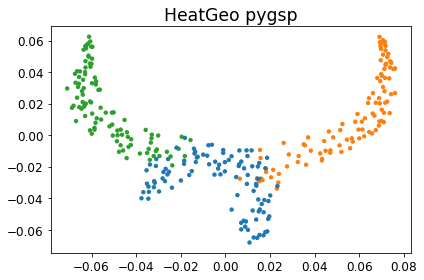

In [5]:
heat_geo_op = new_HeatGeo(knn=knn, anisotropy=anisotropy, decay=decay, tau=tau, filter_method="pygsp")
heat_geo_op.scatterplot(data, labels=labels, title="HeatGeo pygsp")

Testing the multiscale heat-geo

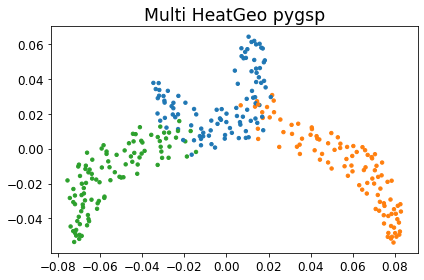

In [6]:
n_tau=5
tau_min=0.05
tau_max=5
heat_geo_op = new_HeatGeo(knn=knn, anisotropy=anisotropy, decay=decay, tau=tau, filter_method="pygsp", n_tau=n_tau, tau_min=tau_min, tau_max=tau_max)
heat_geo_op.scatterplot(data, labels=labels, title="Multi HeatGeo pygsp")

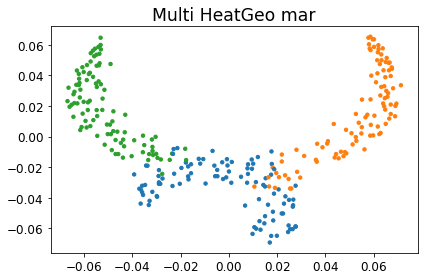

In [5]:
n_tau=4
tau_min=0.005
tau_max=1
heat_geo_op = new_HeatGeo(knn=knn, anisotropy=anisotropy, decay=decay, tau=tau, filter_method="mar", n_tau=n_tau, tau_min=tau_min, tau_max=tau_max)
heat_geo_op.scatterplot(data, labels=labels, title="Multi HeatGeo mar")

testing the log normalization

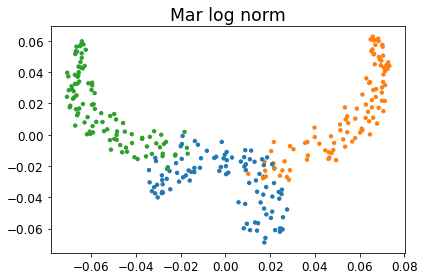

In [8]:
heat_geo_op = new_HeatGeo(knn=knn, anisotropy=1, decay=decay, tau=0.6, filter_method="mar", n_tau=1, tau_min=tau_min, tau_max=tau_max, log_normalize=True)
heat_geo_op.scatterplot(data, labels=labels, title="Mar log norm")

In [8]:
knn=5
anisotropy=0
decay=40
tau=1

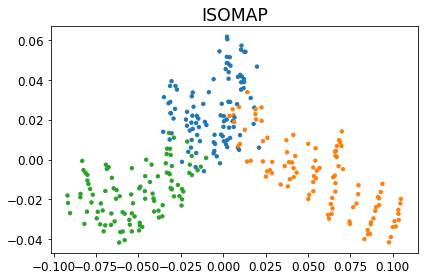

In [9]:
emb_op = ShortestPath(knn=knn)
emb_op.scatterplot(data, labels=labels, title="ISOMAP")

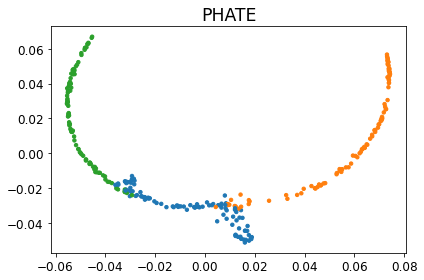

In [10]:
emb_op = PhateBasic(knn=knn, anisotropy=anisotropy)
emb_op.scatterplot(data, labels=labels, title="PHATE")

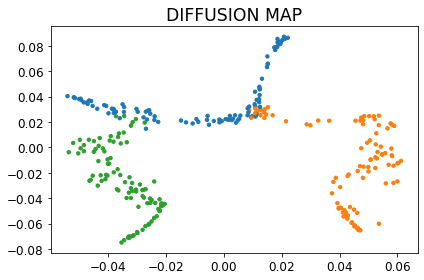

In [11]:
emb_op = DiffusionMap(knn=knn, anisotropy=anisotropy, tau=10)
emb_op.scatterplot(data, labels=labels, title="DIFFUSION MAP") # HERE Diffusion map is weird because it is MDS on the diffusion distances.

In [25]:
# Selective denoising
denoising=True
n_ref=30

(300,)
Before denoising (300, 300)
After (300, 300)


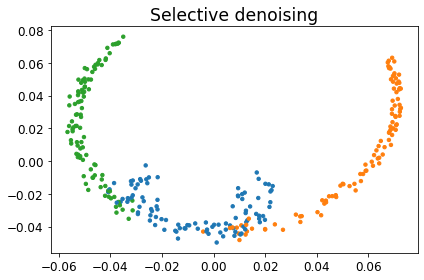

In [27]:
heat_geo_op = new_HeatGeo(knn=knn, anisotropy=1, decay=decay, tau=0.6, filter_method="mar", n_tau=1, denoising=denoising, n_ref=n_ref, n_svd=30)
heat_geo_op.scatterplot(data, labels=labels, title="Selective denoising")

In [9]:
heat_geo_op.dist.shape

(300,)